In [1]:
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Read the data set
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

# Generate dummies for job
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job")],axis=1)
df.drop('job', axis=1, inplace=True)

# Generate dummies for area
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area")],axis=1)
df.drop('area', axis=1, inplace=True)

# Generate dummies for product
df = pd.concat([df,pd.get_dummies(df['product'],prefix="product")],axis=1)
df.drop('product', axis=1, inplace=True)

# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

# Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['subscriptions'] = zscore(df['subscriptions'])

# Convert to numpy - Classification
x_columns = df.columns.drop('age').drop('id')
x = df[x_columns].values
y = df['age'].values

# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Since regression
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 1500 samples, validate on 500 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
 - 1s - loss: 1418.1003 - val_loss: 1026.3214
Epoch 2/1000
 - 0s - loss: 694.8466 - val_loss: 382.6462
Epoch 3/1000
 - 0s - loss: 317.3958 - val_loss: 266.6038
Epoch 4/1000
 - 0s - loss: 251.4878 - val_loss: 218.9192
Epoch 5/1000
 - 0s - loss: 201.1158 - val_loss: 173.2752
Epoch 6/1000
 - 0s - loss: 156.2177 - val_loss: 136.7673
Epoch 7/1000
 - 0s - loss: 120.3968 - val_loss: 106.6760
Epoch 8/1000
 - 0s - loss: 92.7652 - val_loss: 83.6103
Epoch 9/1000
 - 0s - loss: 72.6254 - val_loss: 67.6583
Epoch 10/1000
 - 0s - loss: 58.0858 - val_loss: 57.7663
Epoch 11/1000
 - 0s - loss: 48.2653 - val_loss: 48.3927
Epoch 12/1000
 - 0s - loss: 40.7107 - val_loss: 41.7527
Epoch 13/1000
 - 0s - loss: 34.7339 - val_loss: 36.5599
Epoch 14/1000
 - 0s - loss: 30.1736 - val_loss: 32

In [3]:
from sklearn import metrics

# Predict
pred = model.predict(x_test)

# Measure MSE error. The problem is that the units are not the same as the one of the data 
score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

Final score (MSE): 0.625566432344669


In [4]:
import numpy as np

# Measure RMSE error.  RMSE is common for regression because it has the same unit.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.7909275771805336


### Lift Chart


To generate a lift chart, perform the following activities:

* Sort the data by expected output. Plot the blue line above.
* For every point on the x-axis plot the predicted value for that same data point. This is the green line above.
* The x-axis is just 0 to 100% of the dataset. The expected always starts low and ends high.
* The y-axis is ranged according to the values predicted.

Reading a lift chart:

* The expected and predict lines should be close. Notice where one is above the ot other.
* The below chart is the most accurate on lower age.

In [8]:
#pred.flatten() # convert it to a 1d vector 

In [5]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

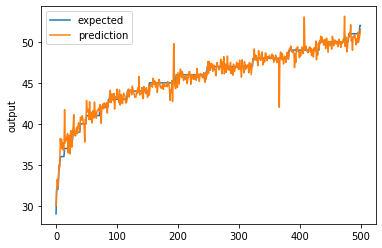

In [9]:
# Plot the chart
chart_regression(pred.flatten(),y_test)